In [52]:
# rted and construct our email spam detector!

# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Libraries for visualisation

import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
# Load the dataset
df = pd.read_csv(r"C:\Users\akshi\OneDrive\Desktop\akshi\ML\spam.csv",encoding='latin-1')

# Display the first few rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [55]:
# Drop unnecessary columns from the DataFrame

columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [56]:
# Displaying the data

df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [57]:
# Consice information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [58]:
df.shape

(5572, 2)

In [59]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [60]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [61]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [62]:
# Rename the columns "v1 and "v2" to new names

new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)

In [63]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


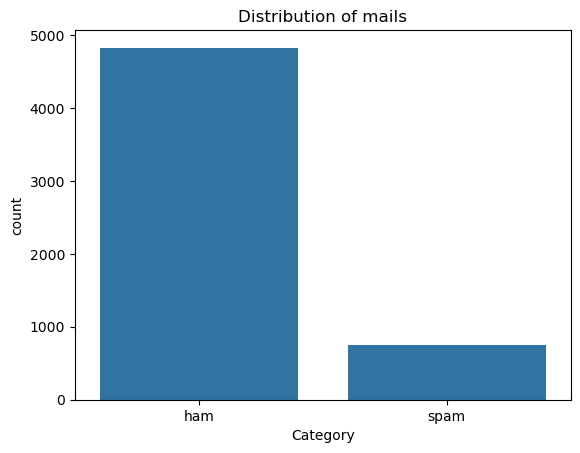

In [ ]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

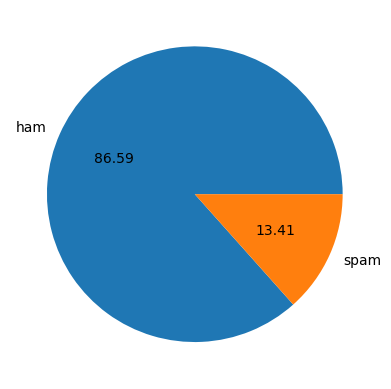

In [65]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [66]:
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1

In [67]:
# Separate the feature (message) and target (category) data

X = df["Message"]
Y = df["Category"]

In [68]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [69]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [71]:
# Print the shape of X
print(X.shape)

(5572,)


In [72]:
# Print the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(4457,)
(1115,)


In [73]:
# Initialize TF-IDF Vectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [74]:
# Feature extraction for training and testing data
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [75]:
# Convert Y_train and Y_test to integer type
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [76]:
print(X_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object


In [77]:
print(X_train_features)

  (0, 4513)	0.2909649098524696
  (0, 3380)	0.21807195185332803
  (0, 3262)	0.25877035357606315
  (0, 3136)	0.440116181574609
  (0, 2122)	0.38613577623520473
  (0, 3386)	0.3219352588930141
  (0, 6599)	0.20296878731699391
  (0, 4296)	0.3891385935794867
  (0, 3979)	0.2410582143632299
  (0, 741)	0.3219352588930141
  (1, 7443)	0.35056971070320353
  (1, 6442)	0.5652509076654626
  (1, 6417)	0.4769136859540388
  (1, 6872)	0.4306015894277422
  (1, 4061)	0.380431198316959
  (2, 5825)	0.4917598465723273
  (2, 2226)	0.413484525934624
  (2, 3917)	0.40088501350982736
  (2, 2109)	0.42972812260098503
  (2, 933)	0.4917598465723273
  (3, 7453)	0.5202633571003087
  (3, 1842)	0.3708680641487708
  (3, 1599)	0.5927091854194291
  (3, 6140)	0.4903863168693604
  (4, 1842)	0.36051481797205776
  :	:
  (4452, 4636)	0.4030918768627523
  (4453, 1762)	0.45610005640082985
  (4453, 7273)	0.5787739591782677
  (4453, 999)	0.6760129013031282
  (4454, 5370)	0.42618909997886
  (4454, 7346)	0.31166263834107377
  (4454, 1049

Visualizing the Plots


In [78]:
from sklearn.decomposition import PCA

# Reduce dimensions of TF-IDF features to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_features.toarray())
X_test_pca = pca.transform(X_test_features.toarray())

In [79]:

# Combine the reduced training data and their labels
X_pca = np.vstack((X_train_pca, X_test_pca))
Y_combined = np.hstack((Y_train, Y_test))

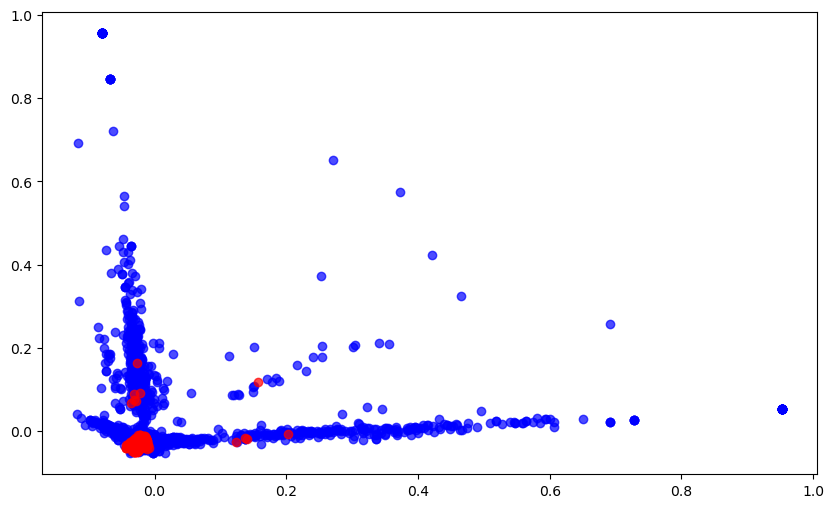

In [80]:
# Plot the data points for "ham" and "spam"
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[Y_combined == 1, 0], X_pca[Y_combined == 1, 1], color='blue', alpha=0.7, label='Ham')
plt.scatter(X_pca[Y_combined == 0, 0], X_pca[Y_combined == 0, 1], color='red', alpha=0.7, label='Spam')


In [81]:
# Fit logistic regression on 2D PCA data
model_2d = LogisticRegression()
model_2d.fit(X_train_pca, Y_train)

LogisticRegression()

In [82]:
# Create a meshgrid for the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

In [83]:

# Predict probabilities for the grid points
Z = model_2d.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


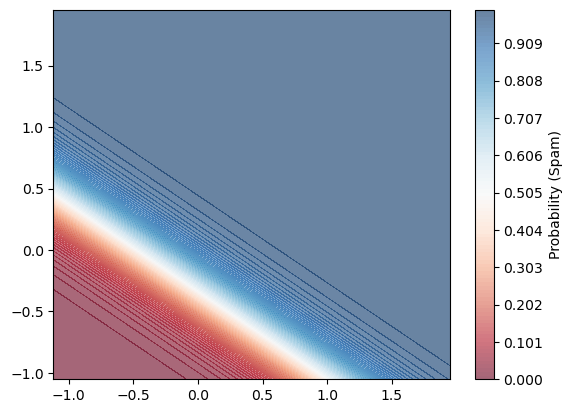

In [84]:
# Plot the decision boundary
plt.contourf(xx, yy, Z, levels=np.linspace(0, 1, 100), cmap='RdBu', alpha=0.6)
plt.colorbar(label="Probability (Spam)")


C:\Users\akshi\AppData\Local\Temp\ipykernel_21652\3632514688.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


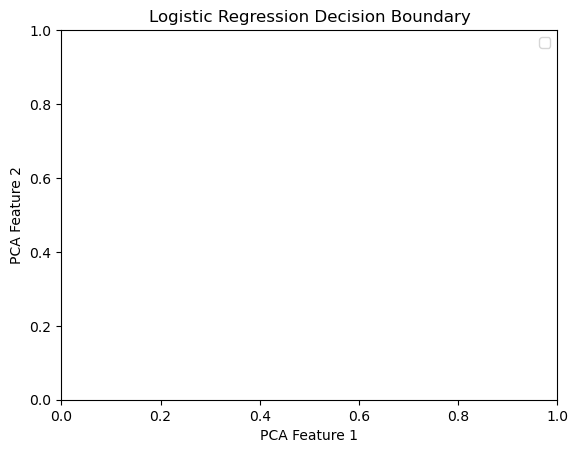

In [85]:

# Finalize plot
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()


Plotting the curve


In [86]:
# Use one feature for logistic regression to create a 1D plot
from sklearn.preprocessing import LabelEncoder

# Encode "Category" as binary (0 for Spam, 1 for Ham) if not already done
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

In [87]:

# Select a single feature (after TF-IDF transformation) for simplicity
X_single_feature = X_train_features[:, 0].toarray().flatten()  # Using the first feature
Y_single_feature = Y_train


In [88]:

# Fit logistic regression on the single feature
model_1d = LogisticRegression()
model_1d.fit(X_single_feature.reshape(-1, 1), Y_single_feature)

LogisticRegression()

In [89]:

# Generate a range of input values for plotting
x_values = np.linspace(X_single_feature.min(), X_single_feature.max(), 500).reshape(-1, 1)
y_probabilities = model_1d.predict_proba(x_values)[:, 1]  # Probability of being "Ham"


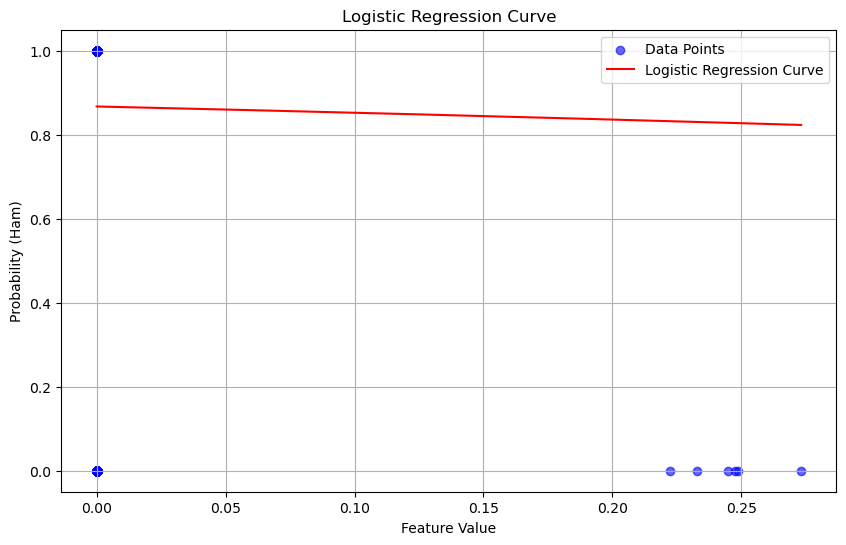

In [90]:
# Plot the data and logistic regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X_single_feature, Y_single_feature, color='blue', alpha=0.6, label='Data Points')
plt.plot(x_values, y_probabilities, color='red', label='Logistic Regression Curve')
plt.title('Logistic Regression Curve')
plt.xlabel('Feature Value')
plt.ylabel('Probability (Ham)')
plt.legend()
plt.grid(True)
plt.show()

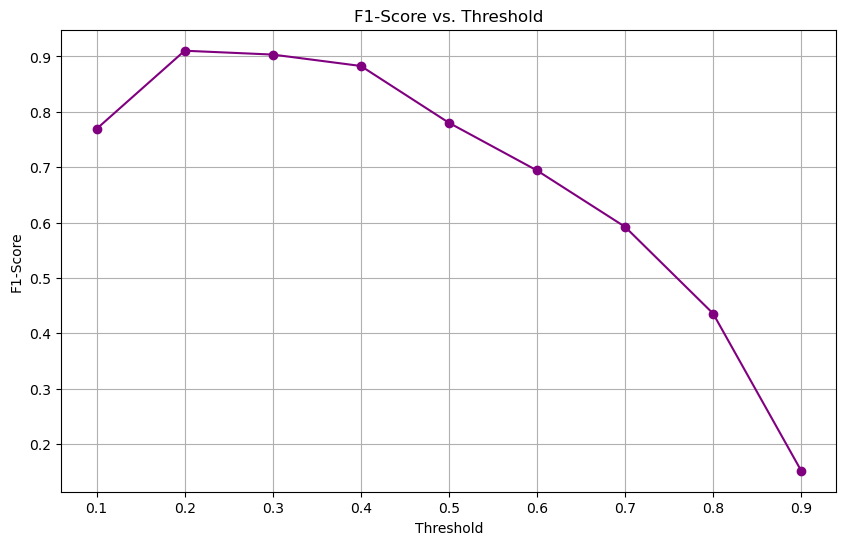

In [104]:
from sklearn.metrics import f1_score

# Compute F1 score for various thresholds
f1_scores = [f1_score(Y_test, (y_test_probabilities >= threshold).astype(int)) for threshold in np.arange(0.1, 1, 0.1)]

# Plot F1 score vs. threshold curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0.1, 1, 0.1), f1_scores, marker='o', color='purple')
plt.title('F1-Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.grid(True)
plt.show()


In [91]:
# Create and Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [92]:
 #Make predictions on the training data
predict_train_data=model.predict(X_train_features)

In [93]:
#Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9661207089970832


In [94]:
# Make predictions on the testing data
predict_test_data=model.predict(X_test_features)

In [95]:
#Model Evaluation
accuracy_test_data=accuracy_score(Y_test,predict_test_data)
print("acuuracy on test data: ",accuracy_test_data)

acuuracy on test data:  0.9623318385650225


In [96]:
new_mail=["Congratulations on your recent achievement! Well done."]
new_data_features=feature_extraction.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


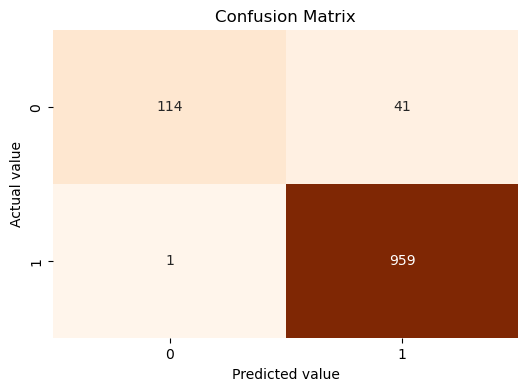

In [97]:
conf_matrix=confusion_matrix(Y_test,predict_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

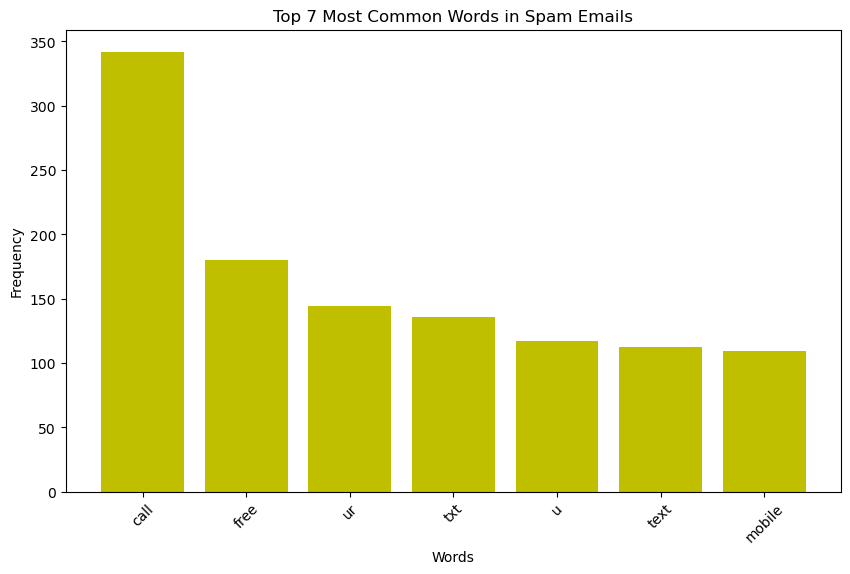

In [98]:
# Data visualization - Top 7 Most Common Words in Spam Emails

stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
ham_words = " ".join(df[df['Category'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(7)), color='y')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 7 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()

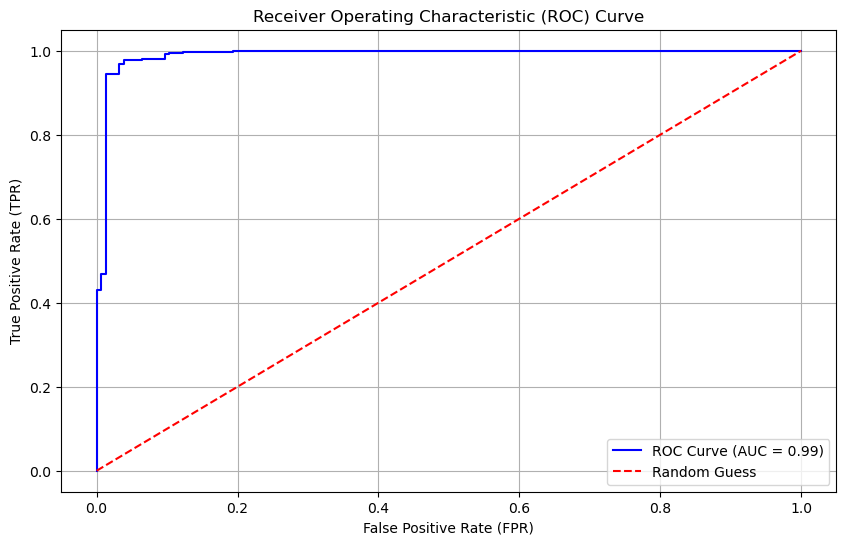

In [99]:
# Compute the predicted probabilities for the test data
y_test_probabilities = model.predict_proba(X_test_features)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_test_probabilities)

# Compute the AUC score
auc_score = roc_auc_score(Y_test, y_test_probabilities)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()


In [101]:
<kaggle kernels output anaghakp/email-spam-detection -p /path/to/dest

SyntaxError: invalid syntax (99425633.py, line 1)

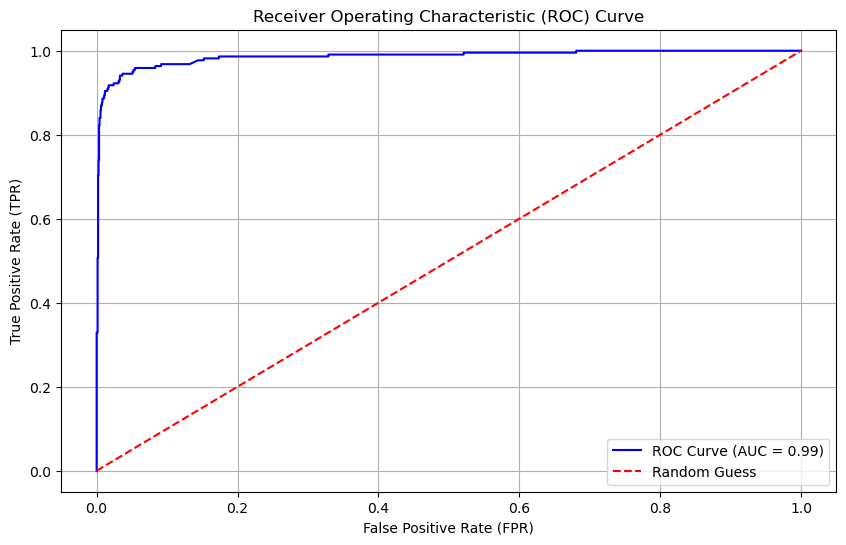

Accuracy: 0.95
Confusion Matrix:
[[1450    3]
 [  77  142]]


In [102]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("spam.csv", encoding='latin-1')

# Drop unnecessary columns
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

# Rename columns for clarity
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

# Convert 'Category' to numeric: spam = 1, ham = 0
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

# Split the data into features (X) and labels (Y)
X = df['Message']
Y = df['Category']

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Apply TF-IDF Vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_features, Y_train)

# Make predictions on the test set
y_test_probabilities = model.predict_proba(X_test_features)[:, 1]  # Probabilities for class 1 (spam)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_test_probabilities)

# Compute the AUC score
auc_score = roc_auc_score(Y_test, y_test_probabilities)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Display confusion matrix and accuracy score
y_pred = model.predict(X_test_features)
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))


Accuracy: 0.95
Confusion Matrix:
[[1450    3]
 [  77  142]]
Precision: 0.98
Recall: 0.65
F1-Score: 0.78
AUC Score: 0.99


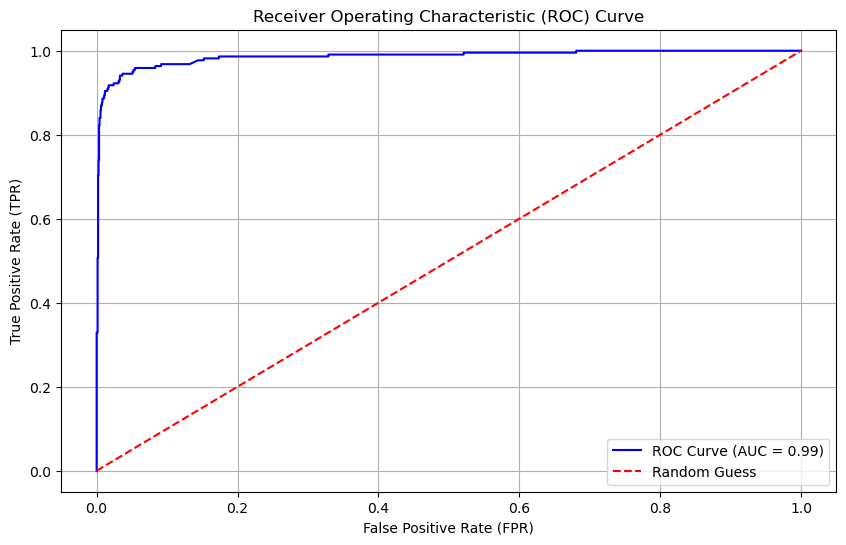

In [103]:
# Import necessary metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Make predictions on the test set
y_pred = model.predict(X_test_features)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test, y_test_probabilities)
auc_score = roc_auc_score(Y_test, y_test_probabilities)

# Display the AUC score
print(f"AUC Score: {auc_score:.2f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 0.95
Confusion Matrix:
[[1450    3]
 [  77  142]]
Precision: 0.98
Recall: 0.65
F1-Score: 0.78
AUC Score: 0.99


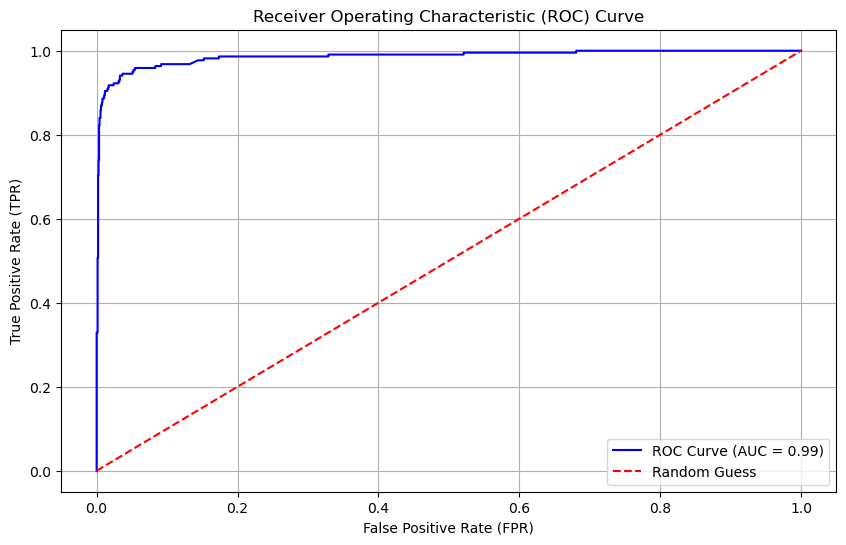

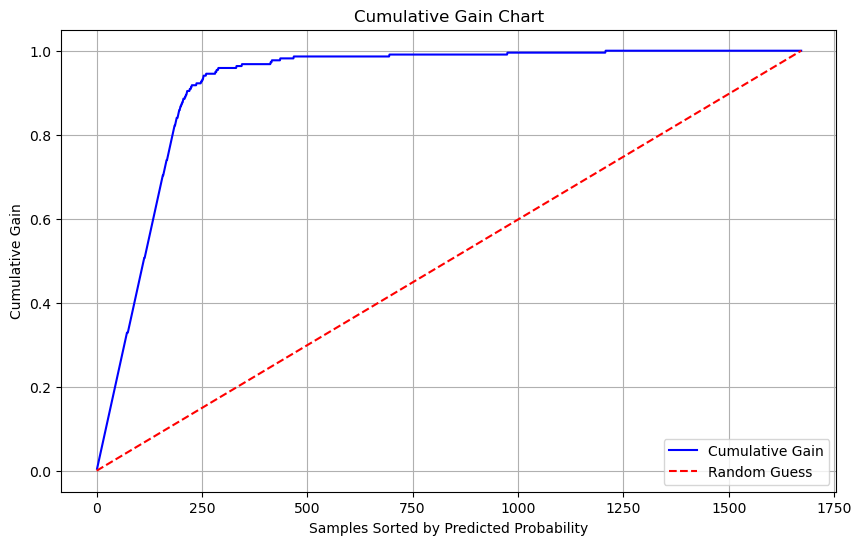

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Make predictions on the test set
y_pred = model.predict(X_test_features)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test, y_test_probabilities)
auc_score = roc_auc_score(Y_test, y_test_probabilities)

# Display the AUC score
print(f"AUC Score: {auc_score:.2f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()

# Cumulative Gain Chart
# Get predicted probabilities for spam (1) class
y_test_probabilities = model.predict_proba(X_test_features)[:, 1]

# Sort the predicted probabilities in descending order
sorted_indices = np.argsort(y_test_probabilities)[::-1]
sorted_true_labels = Y_test.iloc[sorted_indices]
sorted_pred_probabilities = y_test_probabilities[sorted_indices]

# Compute cumulative gains: cumulative sum of positive labels divided by total positives
cumulative_gains = np.cumsum(sorted_true_labels) / np.sum(sorted_true_labels)

# Plot Cumulative Gain Chart
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_gains) + 1), cumulative_gains, label='Cumulative Gain', color='blue')
plt.plot([0, len(cumulative_gains)], [0, 1], linestyle='--', color='red', label='Random Guess')
plt.title('Cumulative Gain Chart')
plt.xlabel('Samples Sorted by Predicted Probability')
plt.ylabel('Cumulative Gain')
plt.legend()
plt.grid(True)
plt.show()


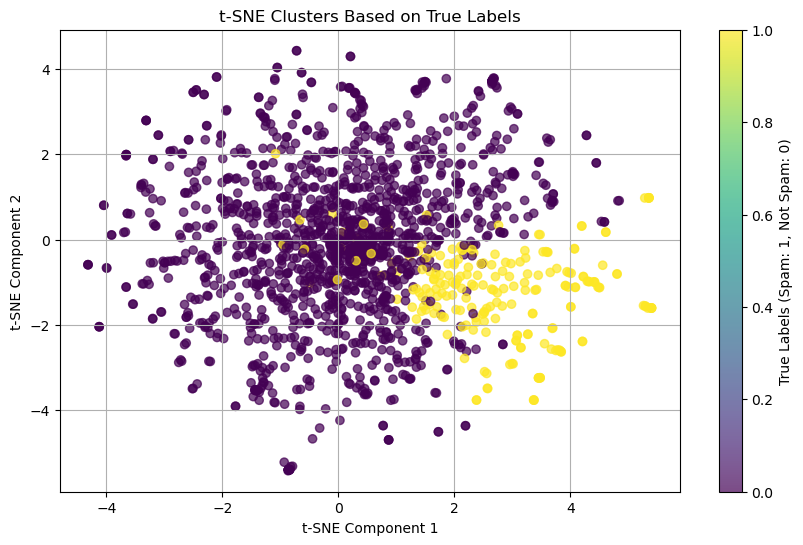

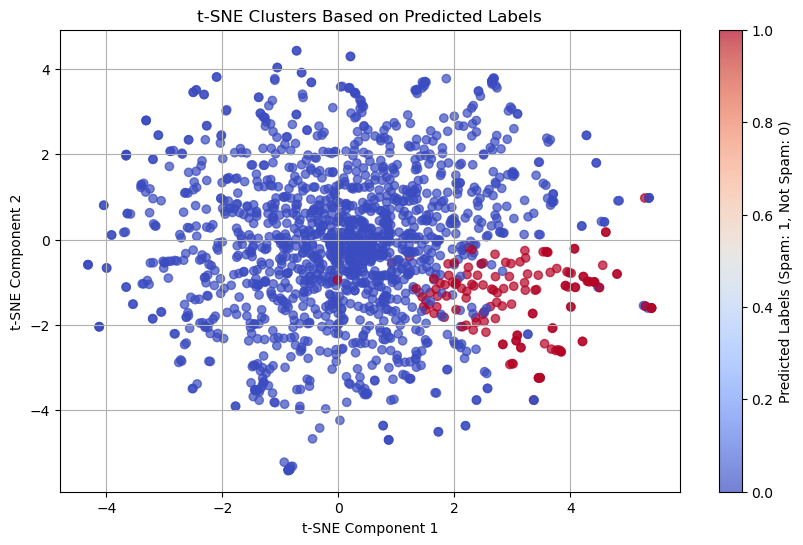

In [106]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Perform t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_test_features.toarray() if hasattr(X_test_features, "toarray") else X_test_features)

# Plot the clusters with true labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=Y_test, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='True Labels (Spam: 1, Not Spam: 0)')
plt.title('t-SNE Clusters Based on True Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

# Plot the clusters with predicted labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred, cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label='Predicted Labels (Spam: 1, Not Spam: 0)')
plt.title('t-SNE Clusters Based on Predicted Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


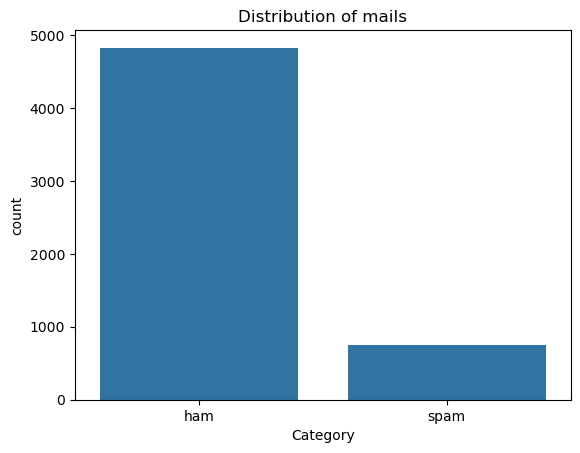

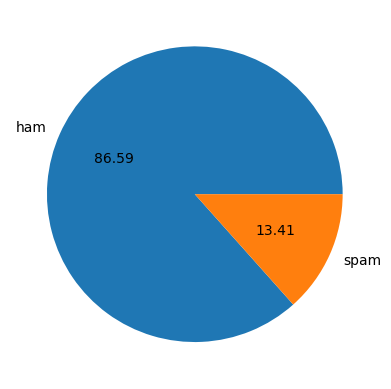

In [107]:
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Libraries for visualisation

import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
# Load the dataset
df = pd.read_csv(r"C:\Users\akshi\OneDrive\Desktop\akshi\ML\spam.csv",encoding='latin-1')

# Display the first few rows of the dataset
df.head()
# Drop unnecessary columns from the DataFrame

columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)
df
df.info()
df.describe()
df.isnull().sum()
df.columns
new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)
df.head()
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()



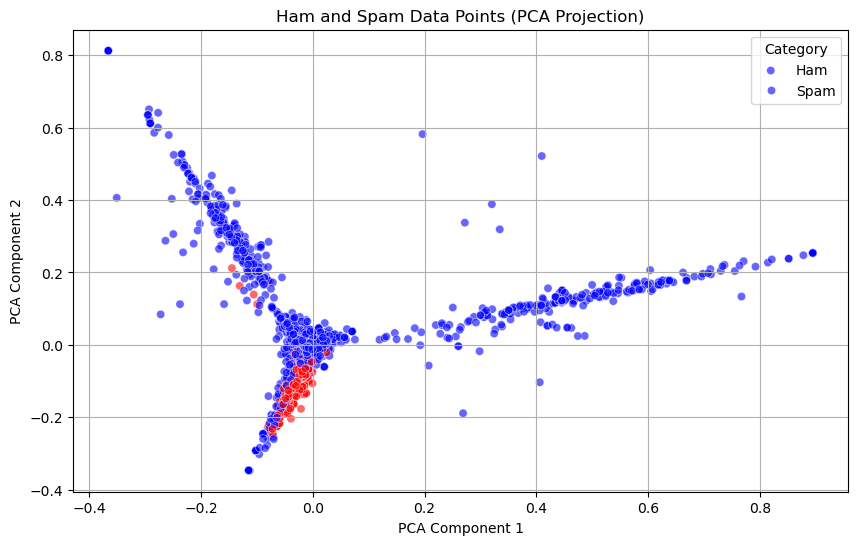

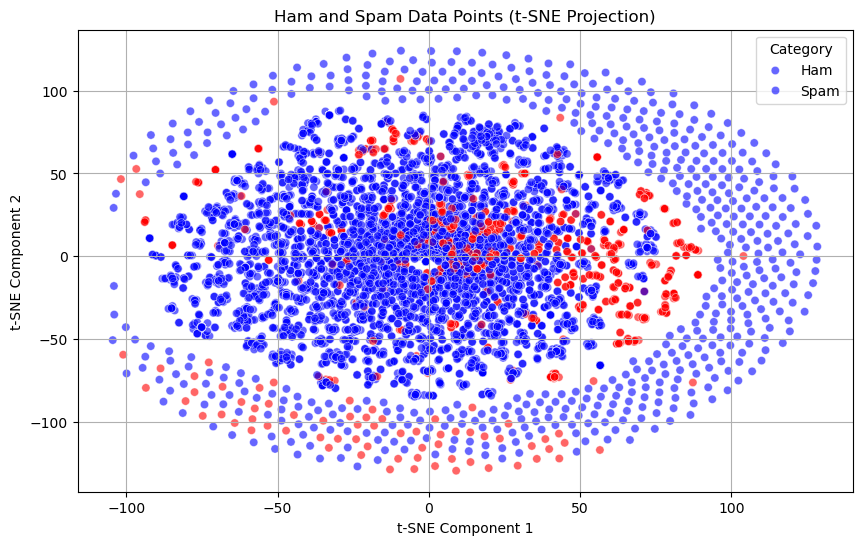

In [108]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Preprocessing: Convert text to numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=500)
X = tfidf_vectorizer.fit_transform(df['Message'])
y = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)  # Encode categories (spam=1, ham=0)

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

# Plot the data points using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y,
    palette={0: 'blue', 1: 'red'},
    alpha=0.6
)
plt.title("Ham and Spam Data Points (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(labels=['Ham', 'Spam'], title="Category")
plt.grid(True)
plt.show()

# Optional: t-SNE for a more detailed visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=y,
    palette={0: 'blue', 1: 'red'},
    alpha=0.6
)
plt.title("Ham and Spam Data Points (t-SNE Projection)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(labels=['Ham', 'Spam'], title="Category")
plt.grid(True)
plt.show()


C:\Users\akshi\AppData\Local\Temp\ipykernel_21652\707667285.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='viridis')  # Use Seaborn's countplot


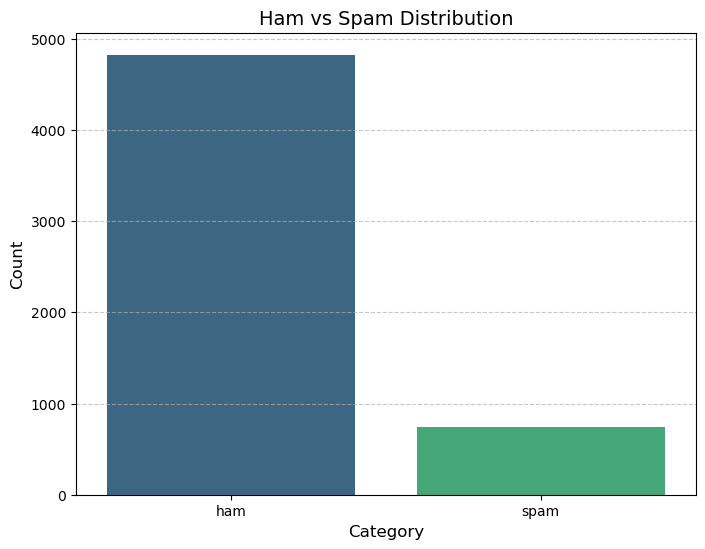

In [109]:
# Count Plot for Category Distribution (Ham vs Spam)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Category', palette='viridis')  # Use Seaborn's countplot
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Ham vs Spam Distribution', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
